In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta
import mplfinance as mpf
import scipy
from scipy import stats
from scipy import signal
import math
#https://github.com/neurotrader888

In [2]:
scaled=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\Technical analysis\\BTCUSDT86400.csv',index_col='date')
scaled

,open,high,low,close
date,,,,
2018-01-02,13382.16,15473.49,12890.02,14675.11
2018-01-03,14690.00,15307.56,14150.00,14919.51
2018-01-04,14919.51,15280.00,13918.04,15059.54
2018-01-05,15059.56,17176.24,14600.00,16960.39
2018-01-06,16960.39,17143.13,16011.21,17069.79
...,...,...,...,...
2022-12-27,16919.39,16972.83,16592.37,16706.36
2022-12-28,16706.06,16785.19,16465.33,16547.31
2022-12-29,16547.32,16664.41,16488.91,16633.47


In [3]:
scaled['high'][0]

15473.490000000002

In [4]:
scaled.index.to_numpy()

array(['2018-01-02', '2018-01-03', '2018-01-04', ..., '2022-12-29',
       '2022-12-30', '2022-12-31'], dtype=object)

In [5]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [index[tmp_max_i], tmp_max+tmp_max*0.001]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [index[tmp_min_i], tmp_min-tmp_min*0.001]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

In [6]:
tops, bottoms = directional_change(scaled['close'].to_numpy(), scaled['high'].to_numpy(),scaled.index.to_numpy(),scaled['low'].to_numpy(), 0.10)
tops

[['2018-01-05', 17193.416240000002],
 ['2018-01-09', 15515.5],
 ['2018-01-13', 14594.58],
 ['2018-01-20', 13112.099],
 ['2018-01-28', 12256.244],
 ['2018-02-03', 9482.483010000002],
 ['2018-02-10', 9074.845780000001],
 ['2018-02-20', 11797.79601],
 ['2018-03-05', 11721.71],
 ['2018-03-12', 9898.76888],
 ['2018-03-21', 9186.18701],
 ['2018-04-03', 7527.52],
 ['2018-05-05', 10030.02],
 ['2018-06-19', 6848.58174],
 ['2018-07-25', 8500.261770000001],
 ['2018-09-04', 7417.41],
 ['2018-10-15', 7687.68],
 ['2018-11-29', 4454.83038],
 ['2018-12-09', 3661.658],
 ['2018-12-24', 4202.197999999999],
 ['2019-01-08', 4073.8698000000004],
 ['2019-02-24', 4202.198],
 ['2019-05-14', 8374.366],
 ['2019-05-30', 9083.33426],
 ['2019-06-26', 13983.97],
 ['2019-06-28', 12492.48],
 ['2019-07-10', 13160.22708],
 ['2019-07-20', 11080.05899],
 ['2019-08-06', 12343.030700000001],
 ['2019-08-20', 10960.909959999999],
 ['2019-09-06', 10916.775870000001],
 ['2019-10-11', 8788.28951],
 ['2019-10-26', 10380.37],
 ['2

In [7]:
tp=pd.DataFrame()
tp[['Date','Price']]=tops
tp.index=tp.Date
tp
x=pd.to_datetime(tp.index)
tp.set_index(x, inplace=True)
t=tp.asfreq('D')
tp

,Date,Price
Date,,
2018-01-05,2018-01-05,17193.41624
2018-01-09,2018-01-09,15515.5
2018-01-13,2018-01-13,14594.58
2018-01-20,2018-01-20,13112.099
2018-01-28,2018-01-28,12256.244
...,...,...
2022-08-15,2022-08-15,25236.53132
2022-09-13,2022-09-13,22821.799
2022-11-05,2022-11-05,21502.13065


In [8]:
bt=pd.DataFrame()
bt[['Date','Price']]=bottoms
bt.index=bt.Date
y=pd.to_datetime(bt.index)
bt.set_index(y, inplace=True)
f=tp.asfreq('D')

In [9]:
bt

,Date,Price
Date,,
2018-01-08,2018-01-08,12799.188
2018-01-11,2018-01-11,11388.6
2018-01-16,2018-01-16,9025.965
2018-01-22,2018-01-22,9890.33976
2018-02-02,2018-02-02,8002.00998
...,...,...
2022-07-26,2022-07-26,20685.7935
2022-09-07,2022-09-07,18492.25923
2022-09-21,2022-09-21,18107.85402


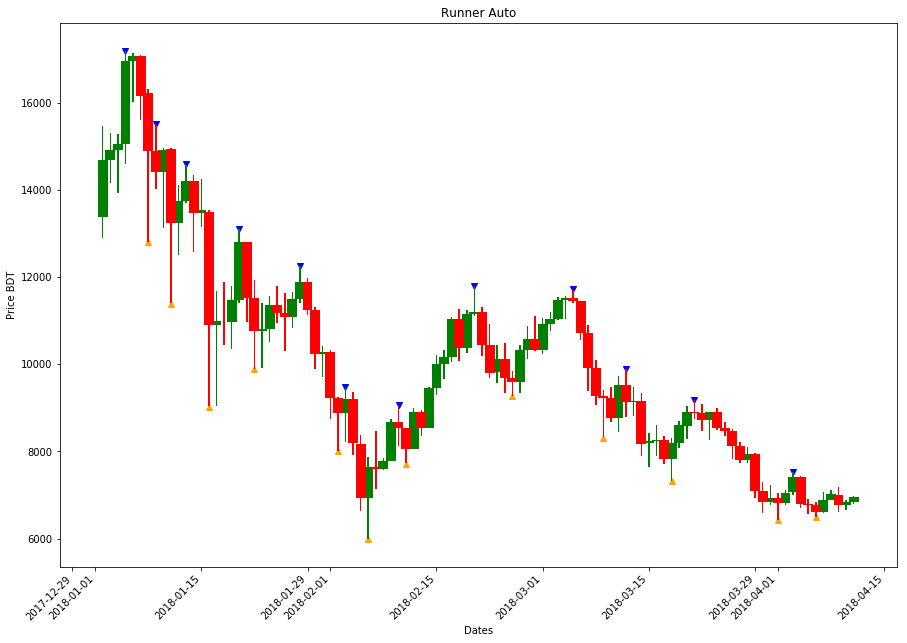

In [10]:
df=scaled[:100]

m=pd.to_datetime(df.index)
m
df.set_index(m, inplace=True)
t=df.asfreq('D')

#create figure
plt.figure(figsize=(15,10))
df1=df
#define width of candlestick elements
width = 1.3
width2 = 0.2

#define up and down prices
up = df1[df1.close>=df1.open]
down = df1[df1.close<df1.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.close,width2,bottom=down.close,color=col2)
plt.bar(down.index,down.low-down.open,width2,bottom=down.open,color=col2)
plt.scatter(tp.loc[str(df.index[0])[0:10]:str(df.index[-1])[0:10]].index,tp.loc[str(df.index[0])[0:10]:str(df.index[-1])[0:10]].Price.values,color='b',marker='v')
plt.scatter(bt.loc[str(df.index[0])[0:10]:str(df.index[-1])[0:10]].index,bt.loc[str(df.index[0])[0:10]:str(df.index[-1])[0:10]].Price.values,color='orange',marker='^')


#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.show()